### This python code scrapes map image from given url. this was created as a trial. Please refer to the Pegel_scraping_Images_all.ipynb for scraping all images

In [16]:
# Import necessary packages 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
from urllib.request import urlopen

### With this code, we can scrape the map and store in local directory

In [2]:
url = requests.get('https://howis.eglv.de/pegel/html/stammdaten_html/MO_StammdatenPegel.php?PIDVal=55').text
soup = BeautifulSoup(url, 'lxml') 

In [3]:
Map_tags = soup.find('div', {'id':'mapcontainer'}) # tags containg our desired map 

In [4]:
Map_tags = Map_tags.find('img')  # using find to look for tag 'img'

In [5]:
imagelinks = []
for tags in Map_tags:
    imagelinks.append(Map_tags['src'])

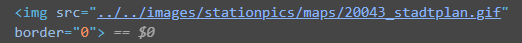

In [6]:
ext_url = Map_tags['src'] # images contained as .gif like inside src 

In [7]:
ext_url # getting the url extension 

'../../images/stationpics/maps/30097_stadtplan.gif'

In [8]:
ext_url = ext_url[5:]   # deleting first 5 characters to extract the url without ./..

In [9]:
base_url = "https://howis.eglv.de/pegel"   # storing the base url 

In [10]:
full_url = base_url + ext_url    

In [11]:
full_url

'https://howis.eglv.de/pegel/images/stationpics/maps/30097_stadtplan.gif'

In [12]:
response = requests.get(full_url, stream=True)

In [13]:
response   # checking for response 200 m ie succesful message 

<Response [200]>

In [14]:
#!pip install pillow

In [17]:

with open("Pegel_Station1.jpg", "wb") as f:
    f.write(response.content)
    f.close()   # storing images under file name Pegel_Station1.jpg. Image will be saved in the current directory"